In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import os

grammys_csv = pd.read_csv('datasets/Grammy Award Nominees and Winners 1958-2024.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/Grammy Award Nominees and Winners 1958-2024.csv'

In [11]:
# Load CSV file
grammys_csv = pd.read_csv('datasets/Grammy Award Nominees and Winners 1958-2024.csv')

# Load Excel file (alternative method)
# grammys_excel = pd.read_excel('datasets/Grammy Award Nominees and Winners 1958-2024.xls')

# Load supplementary data
producer_data = pd.read_csv('datasets/Supplementary Table Producer of the Year 2019-2024.csv')

# Display basic information about the dataset
print("Grammy Dataset Shape:", grammys_csv.shape)
print("\nFirst 5 rows:")
grammys_csv.head()

Grammy Dataset Shape: (25305, 9)

First 5 rows:


,Unnamed: 0,Year,Ceremony,Award ID,Award Type,Award Name,Work,Nominee,Winner
0,0,1958,1,587,Work,Best Recording For Children,Childrens' Marching Song (Album),Cyril Stapleton,False
1,1,1958,1,587,Work,Best Recording For Children,"Mommy, Give Me A Drinka Water (Album)",Danny Kaye,False
2,2,1958,1,587,Work,Best Recording For Children,The Witch Doctor,David Seville And The Chipmunks,False
3,3,1958,1,587,Work,Best Recording For Children,Tubby The Tuba,Jose Ferrer,False
4,4,1958,1,587,Work,Best Recording For Children,Fun In Shariland (Album),Shari Lewis And Lambchop,False


<Axes: title={'center': 'Premios/Nominaciones por Año'}, xlabel='Year'>

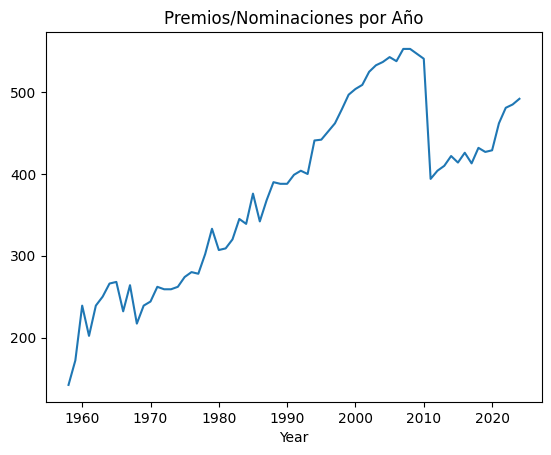

In [20]:
# Distribución de premios por año 
#  ¿Hay más premios en algunos años que en otros?
#¿Han aumentado las categorías en el tiempo?
    
    #¿Hay años con más nominaciones que otros?
df = grammys_csv.copy()
df.groupby('Year').size().plot(kind='line', title='Premios/Nominaciones por Año')


In [38]:
# Artistas más premiados
    #¿Quién ha ganado más grammys en la historia?
    #¿Qué artistas son dominantes en ciertos géneros o décadas?
df = grammys_csv.copy()
df_winners = df[df['Winner']]
print(df_winners.head())

    Unnamed: 0  Year  Ceremony  Award ID Award Type  \
5            5  1958         1       587       Work   
11          11  1958         1       590       Work   
18          18  1958         1       594       Work   
24          24  1958         1       597       Work   
29          29  1958         1       598       Work   

                                           Award Name  \
5                         Best Recording For Children   
11    Best Classical Performance - Operatic Or Choral   
18             Best Classical Performance - Orchestra   
24  Best Classical Performance - Instrumentalist (...   
29  Best Classical Performance - Instrumentalist (...   

                                                 Work  \
5                                   The Chipmunk Song   
11                                           Virtuoso   
18                                  Gaiete Parisienne   
24  Tchaikovsky: Piano Concerto No. 1 In B Flat Mi...   
29                             Segovia Go

In [42]:
#3. Categorías con más nominaciones 
   # • ¿Qué categoría tiene más competencia?
   # • ¿Ha cambiado esto con el tiempo? 
category_counts = df['Award Name'].value_counts()
print(category_counts)

Award Name
Song Of The Year                                                        364
Record Of The Year                                                      362
Album Of The Year                                                       356
Best Opera Recording                                                    334
Best Album Notes                                                        315
                                                                       ... 
World Music Album                                                         4
Best Engineered Record (Classical)                                        4
Best Original Cast Album (Broadway Or Tv)                                 4
Musical Theater Album                                                     3
Best Sound Track Album, Original Cast - Motion Picture Or Television      2
Name: count, Length: 784, dtype: int64


In [46]:
#Género vs Ganadores 
    #• ¿Algunos géneros tienen más probabilidades de ganar?
    #• ¿Cómo ha evolucionado la representación de géneros musicales? 
# Función para extraer el género de Award Name
def extract_genre(award_name):
    # Lista de géneros comunes
    genres = ["Rock", "Pop", "Jazz", "Classical", "R&B", "Hip-Hop", "Country"]
    
    for genre in genres:
        if genre in award_name:
            return genre
    return "Other"  # Si no se encuentra ningún género conocido

# Aplicar la función a la columna 'Award Name'
df['genre'] = df['Award Name'].apply(extract_genre)

# Verificar los primeros valores de la nueva columna 'genre'
print(df[['Award Name', 'genre']].head())
# Contar los ganadores por género
genre_winners = df[df['Winner'] == True].groupby('genre')['Winner'].sum().sort_values(ascending=False)
print(genre_winners)

                    Award Name  genre
0  Best Recording For Children  Other
1  Best Recording For Children  Other
2  Best Recording For Children  Other
3  Best Recording For Children  Other
4  Best Recording For Children  Other
genre
Other        2730
Classical     559
Pop           357
Country       356
Jazz          331
Rock          275
R&B           262
Name: Winner, dtype: int64


In [51]:
# Filtrar los ganadores
df_winners = df[df['Winner'] == True]

# Agrupar por artista y año
artist_year_wins = df_winners.groupby(['Nominee', 'Year']).size().reset_index(name='Wins')

# Función para detectar años consecutivos
def find_consecutive_years(group):
    # Asegurarse de que el DataFrame tenga columnas necesarias
    if 'Nominee' not in group.columns:
        group = group.reset_index()
    
    # Ordenar por año
    group = group.sort_values('Year')
    
    # Calcular la diferencia entre años
    group['year_diff'] = group['Year'].diff()
    
    # Identificar series consecutivas
    group['streak'] = (group['year_diff'] != 1).cumsum()
    
    # Filtrar grupos de años consecutivos con más de un año
    return group.groupby('streak').filter(lambda x: len(x) > 1)

# Aplicar la función por artista
consecutive_wins = artist_year_wins.groupby('Nominee').apply(find_consecutive_years).reset_index(drop=True)

# Eliminar columnas auxiliares (opcional)
consecutive_wins = consecutive_wins.drop(columns=['year_diff', 'streak'])

# Mostrar resultados
print(consecutive_wins)

                              Nominee  Year  Wins
0         (Boston Symphony Orchestra)  1963     1
1         (Boston Symphony Orchestra)  1964     1
2        (Chicago Symphony Orchestra)  1971     1
3        (Chicago Symphony Orchestra)  1972     1
4        (Chicago Symphony Orchestra)  1976     1
..                                ...   ...   ...
679                      Ziggy Marley  2014     1
680  Ziggy Marley & The Melody Makers  1988     1
681  Ziggy Marley & The Melody Makers  1989     1
682                           dc Talk  1996     1
683                           dc Talk  1997     1

[684 rows x 3 columns]


/tmp/ipykernel_60197/1762666025.py:26: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  consecutive_wins = artist_year_wins.groupby('Nominee').apply(find_consecutive_years).reset_index(drop=True)


In [52]:
#Artistas con las Series Más Largas de Ganancias Consecutivas
# Agrupar por artista y contar la longitud de las series consecutivas
longest_streaks = consecutive_wins.groupby('Nominee')['Year'].apply(lambda x: x.diff().ne(1).cumsum()).value_counts()

# Ordenar por longitud de la serie descendente
longest_streaks = longest_streaks.sort_values(ascending=False)

print("Artistas con las series más largas de ganancias consecutivas:")
print(longest_streaks)

Artistas con las series más largas de ganancias consecutivas:
Year
1    569
2     70
3     26
4     12
6      5
5      2
Name: count, dtype: int64


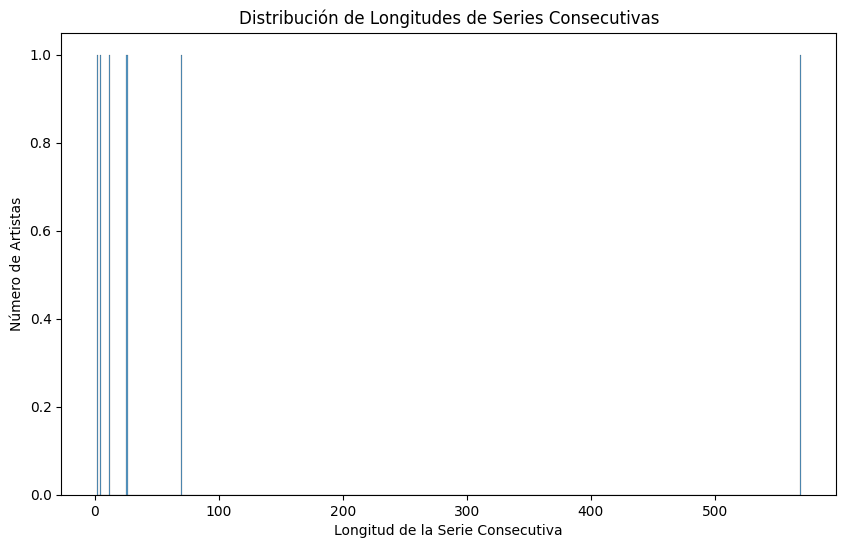

In [56]:
#Visualizar las Series Consecutivas
# Contar la longitud de las series consecutivas
streak_lengths = consecutive_wins.groupby('Nominee')['Year'].apply(lambda x: x.diff().ne(1).cumsum()).value_counts()

# Graficar las longitudes de las series
plt.figure(figsize=(10, 6))
sns.histplot(streak_lengths, bins=range(1, max(streak_lengths.index) + 2), discrete=True)
plt.title('Distribución de Longitudes de Series Consecutivas')
plt.xlabel('Longitud de la Serie Consecutiva')
plt.ylabel('Número de Artistas')
plt.show()

Artistas únicos con series consecutivas por década:
Decade
1950     4
1960    37
1970    41
1980    63
1990    49
2000    60
2010    36
2020    17
Name: Nominee, dtype: int64


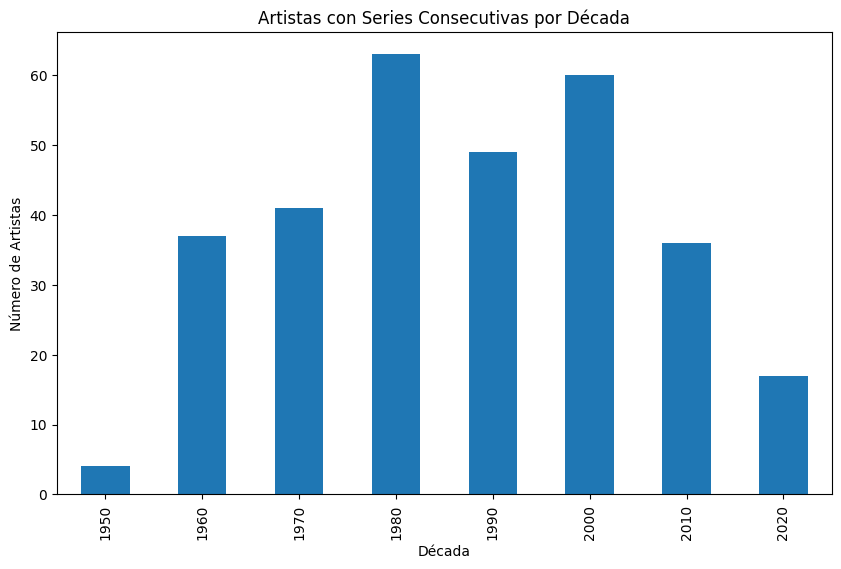

In [57]:
# Analisis por decadas

# Agregar columna de década
consecutive_wins['Decade'] = (consecutive_wins['Year'] // 10) * 10

# Contar artistas únicos por década
artists_per_decade = consecutive_wins.groupby('Decade')['Nominee'].nunique()

# Mostrar resultados
print("Artistas únicos con series consecutivas por década:")
print(artists_per_decade)

# Graficar
plt.figure(figsize=(10, 6))
artists_per_decade.plot(kind='bar')
plt.title('Artistas con Series Consecutivas por Década')
plt.xlabel('Década')
plt.ylabel('Número de Artistas')
plt.show()

Géneros con más series consecutivas de ganancias:
genre
Other        12836
Pop           1152
Country       1000
Classical      906
Rock           762
R&B            751
Jazz           636
Name: count, dtype: int64


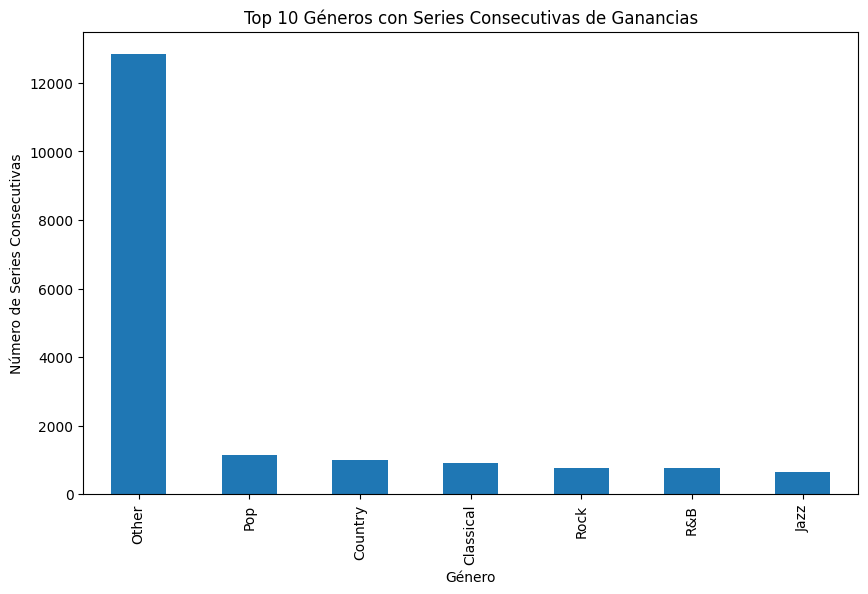

In [63]:
# Generos Dominantes por Década

# Suponiendo que tienes una columna 'Genre'
genre_streaks = consecutive_wins.merge(df[['Nominee', 'genre']], on='Nominee', how='left')

# Contar géneros con series consecutivas
genre_counts = genre_streaks['genre'].value_counts()

# Mostrar resultados
print("Géneros con más series consecutivas de ganancias:")
print(genre_counts)

# Graficar
plt.figure(figsize=(10, 6))
genre_counts.head(10).plot(kind='bar')
plt.title('Top 10 Géneros con Series Consecutivas de Ganancias')
plt.xlabel('Género')
plt.ylabel('Número de Series Consecutivas')
plt.show()


Cantidad de artistas únicos por década:
decade
1950     231
1960    1550
1970    1838
1980    2279
1990    2747
2000    3462
2010    3091
2020    1757
Name: Nominee, dtype: int64


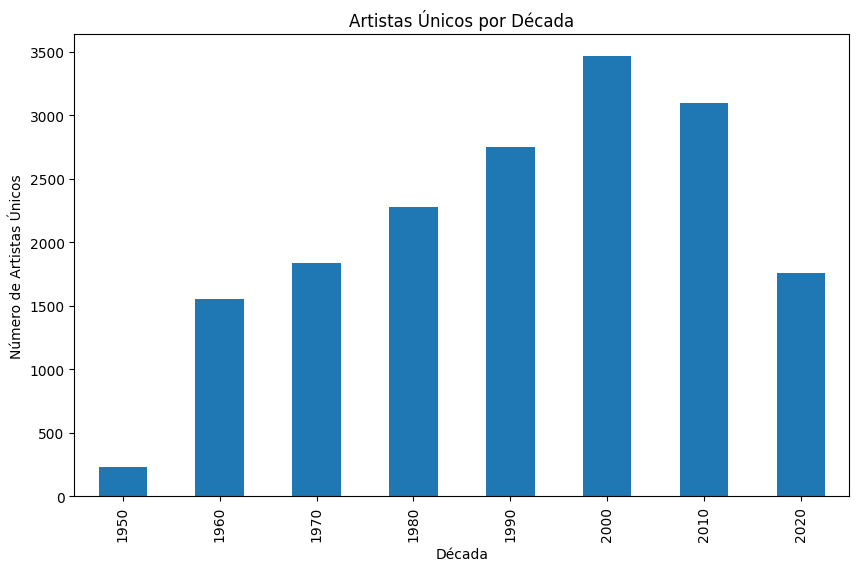

In [66]:
#Dominancia por década 
    #• ¿Qué década tuvo los artistas más exitosos?
    #• ¿Hubo cambios culturales o tecnológicos que afectaron las tendencias? 

# Crear la columna 'decade' basada en la columna 'Year'
df['decade'] = (df['Year'] // 10) * 10

# Agrupar por década y contar la cantidad de artistas únicos
artist_counts_by_decade = df.groupby('decade')['Nominee'].nunique()

# Mostrar resultados
print("\nCantidad de artistas únicos por década:")
print(artist_counts_by_decade)

# Graficar los resultados
plt.figure(figsize=(10, 6))
artist_counts_by_decade.plot(kind='bar')
plt.title('Artistas Únicos por Década')
plt.xlabel('Década')
plt.ylabel('Número de Artistas Únicos')
plt.show()

In [68]:
#Análisis de nominaciones vs victorias 
    #• ¿Cuántas nominaciones necesita un artista para ganar?
    #• ¿Hay artistas con muchas nominaciones pero pocas o ninguna victoria? 

# Contar las nominaciones por artista
nominations = df.groupby('Nominee').size().reset_index(name='total_noms')

# Contar las victorias por artista
wins = df[df['Winner'] == True].groupby('Nominee').size().reset_index(name='wins')

# Combinar ambos DataFrames
combined = pd.merge(nominations, wins, on='Nominee', how='left').fillna(0)

# Calcular la tasa de victoria
combined['win_ratio'] = combined['wins'] / combined['total_noms']

# Mostrar los resultados
print(combined.head())


                                             Nominee  total_noms  wins  \
0  "Bassy" Bob Brockman, Jon Gass, Humberto Gatic...           1   0.0   
1  "Bassy" Bob Brockmann & Martin Brumbach, engin...           1   0.0   
2  "Kye" Rhonda Fleming & Dennis W. Morgan, songw...           1   0.0   
3  "Kye" Rhonda Fleming & Dennis W. Morgan, songw...           1   0.0   
4                             "Little" Jimmy Dickens           1   0.0   

   win_ratio  
0        0.0  
1        0.0  
2        0.0  
3        0.0  
4        0.0  
